In [ ]:
import Classifiers as cl
import process as pp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


fs = 60
window_duration_sec = 2.3
overlap = 0.5

X, y = pp.load_and_preprocess_static_picture('./Train_data', window_duration_sec, fs, overlap, labeling_mode='mode')



y_encoded, label_to_idx = pp.encode_labels(y)
sensor_columns = ['acceleration_x', 'acceleration_y', 'acceleration_z',
                      'gyroscope_x', 'gyroscope_y', 'gyroscope_z']



print("Label to index mapping:", label_to_idx)
print("X shape:", X.shape)  
print("y shape:", y_encoded.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=124)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)






Loading ./Train_data/Jacob_running.csv
The average frequency is approximately 59.08 Hz
Loaded 5820 samples
Segmented into 46 windows
Loading ./Train_data/Jacob_first_gym.csv
The average frequency is approximately 59.65 Hz
Loaded 7105 samples
Segmented into 57 windows
Loading ./Train_data/Julia_first_gym.csv
The average frequency is approximately 61.00 Hz
Loaded 5993 samples
Segmented into 48 windows
Loading ./Train_data/Julia_running.csv
The average frequency is approximately 54.71 Hz
Loaded 4971 samples
Segmented into 39 windows
Loading ./Train_data/julia_sitting_to_fall.csv
The average frequency is approximately 60.64 Hz
Loaded 4987 samples
Segmented into 40 windows
Loading ./Train_data/Marten_second.csv
The average frequency is approximately 60.08 Hz
Loaded 4800 samples
Segmented into 38 windows
Loading ./Train_data/Marten_first.csv
The average frequency is approximately 60.96 Hz
Loaded 2000 samples
Segmented into 16 windows
Loading ./Train_data/sara_first.csv
The average frequency 

0.7258064516129032
0.7016129032258065
[[ 3  2  0  1  0  2  1]
 [ 2  8  1  0  0  0  0]
 [ 0  1  6  0  0  1  1]
 [ 0  0  0  1  0  0  0]
 [ 0  0  3  0  9  6  4]
 [ 0  0  0  0  2 40  2]
 [ 0  0  1  0  0  4 23]]
[[ 3  1  1  1  0  3  0]
 [ 3  8  0  0  0  0  0]
 [ 0  2  5  0  0  1  1]
 [ 0  0  0  1  0  0  0]
 [ 0  0  4  0  7  5  6]
 [ 0  0  0  0  3 38  3]
 [ 0  0  0  0  0  3 25]]


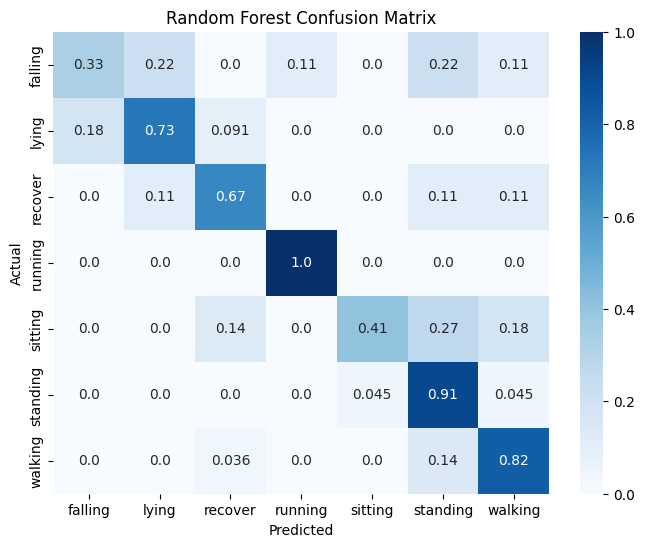

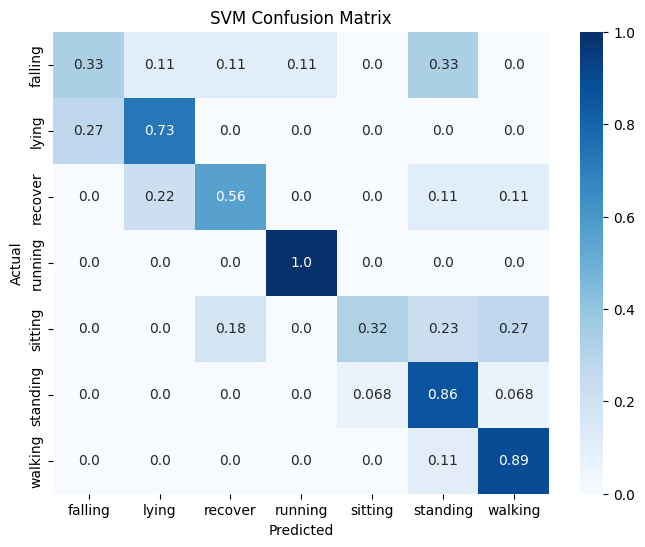

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import Classifiers as cl

def plot_confusion_matrix(cm, title, idx_to_label, labels_order):

    # Create tick labels from the inverted mapping, ensuring the order matches labels_order.
    tick_labels = [idx_to_label[i] for i in labels_order]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2', cmap='Blues',
                xticklabels=tick_labels, yticklabels=tick_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


random_forest = cl.RandomForest(n_estimators=100, criterion='gini', max_depth=None)
random_forest.fit(X_train, y_train)


print(random_forest.score(X_test, y_test))

svm = cl.SupportVectorMachine(C=1.0, kernel='rbf', degree=3, gamma='scale')
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

rf_preds = random_forest.predict(X_test)
svm_preds = svm.predict(X_test)

# The labels parameter should be a list of your class indices.
#print(label_to_idx)
labels_order = sorted(label_to_idx.values())



idx_to_label = {v: str(k) for k, v in label_to_idx.items()}

rf_cm = cl.get_confusion_matrix(y_test, rf_preds, label_mapping=idx_to_label, normalize=True)
#print(rf_cm)


svm_cm = cl.get_confusion_matrix(y_test, svm_preds, label_mapping=idx_to_label, normalize=True)
#print(svm_cm)

plot_confusion_matrix(rf_cm, "Random Forest Confusion Matrix", idx_to_label, labels_order)
plot_confusion_matrix(svm_cm, "SVM Confusion Matrix", idx_to_label, labels_order)
